In [3]:
print(data.head())

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074'  6/29/2017  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074'   7/5/2017  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074'  7/18/2017        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074'   8/1/2017   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074'  8/16/2017        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE  WITHDRAWAL AMT   DEPOSIT AMT BALANCE AMT  
0  6/29/2017              NaN    1,000,000   1,000,000  
1   7/5/2017              NaN    1,000,000   2,000,000  
2  7/18/2017              NaN      500,000   2,500,000  
3   8/1/2017              NaN    3,000,000   5,500,000  
4  8/16/2017              NaN      500,000   6,000,000  


In [2]:
import pandas as pd
# Load the transaction data into a pandas DataFrame
data = pd.read_csv('bank.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Account No           116201 non-null  object 
 1   DATE                 116201 non-null  object 
 2   TRANSACTION DETAILS  113702 non-null  object 
 3   CHQ.NO.              905 non-null     float64
 4   VALUE DATE           116201 non-null  object 
 5    WITHDRAWAL AMT      53549 non-null   object 
 6    DEPOSIT AMT         62652 non-null   object 
 7   BALANCE AMT          116201 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.1+ MB
None


In [4]:
import pandas as pd

# Assuming 'data' is the DataFrame containing your transaction data
print(data.describe())

             CHQ.NO.
count     905.000000
mean   791614.503867
std    151205.932910
min         1.000000
25%    704231.000000
50%    873812.000000
75%    874167.000000
max    874525.000000


In [6]:
import pandas as pd

# Load the transaction data into a pandas DataFrame
data = pd.read_csv('bank.csv')

# Select the categorical column to visualize
category_column = 'TRANSACTION DETAILS'

# Count the occurrences of each category
category_counts = data[category_column].value_counts()
print(category_counts)


TRANSACTION DETAILS
FDRL/INTERNAL FUND TRANSFE          8839
FDRL/NATIONAL ELECTRONIC F          6262
INTERNAL FUND TRANSFER IN           3262
TRF TO  Indiaforensic SERVICES I    3082
TRF FROM  Indiaforensic SERVICES    2107
                                    ... 
RTGS/CIUBH15279642588/Indfor           1
RTGS/KVBLH15279299855/Indfor           1
RTGS/SBTRH15279185865/Indfor           1
NEFT/SBIN615279745176/Indfor           1
IMPS 05-03-20194C                      1
Name: count, Length: 43213, dtype: int64


In [11]:
# Assuming 'data' is the DataFrame containing your transaction data
transaction_counts = data.groupby('Account No')['TRANSACTION DETAILS'].count()

print(transaction_counts)

Account No
1196428'         48779
1196711'         10521
409000362497'    27356
409000405747'       51
409000425051'      802
409000438611'     4588
409000438620'    13454
409000493201'     1044
409000493210'     6014
409000611074'     1093
Name: TRANSACTION DETAILS, dtype: int64


In [15]:
# Assuming 'data' is the DataFrame containing your transaction data
data['TRANSACTION DETAILS'] = data['TRANSACTION DETAILS'].astype(str)
transaction_summary = data.groupby('Account No')['TRANSACTION DETAILS'].agg(COUNT='count', TRANSACTION_DETAILS=', '.join)

print(transaction_summary)

               COUNT                                TRANSACTION_DETAILS
Account No                                                             
1196428'       48779  DSB CASH PICKP IndiaforensicMET0, BEAT CASH PI...
1196711'       10536  436315014201 - REVERSAL, 436418596193 - REVERS...
409000362497'  29840  nan, nan, nan, nan, nan, nan, nan, nan, nan, I...
409000405747'     51  TRF TO Maur Joshi, TRF TO Indiaforensic SERVIC...
409000425051'    802  NEFT/SBIN316054519453/Mr, NEFT/SBIN31605479533...
409000438611'   4588  GOLD LABEL INVESTMENTS (P, TRF TO  M Joshi, TR...
409000438620'  13454  GOLD LABEL INVESTMENTS (P, TRF TO  Indiaforens...
409000493201'   1044  TRF FROM  Indiaforensic SERVICES, BBPS SETTLEM...
409000493210'   6014  TRF FROM  Indiaforensic SERVICES, SCHRG RCRVRY...
409000611074'   1093  TRF FROM  Indiaforensic SERVICES, TRF FROM  In...


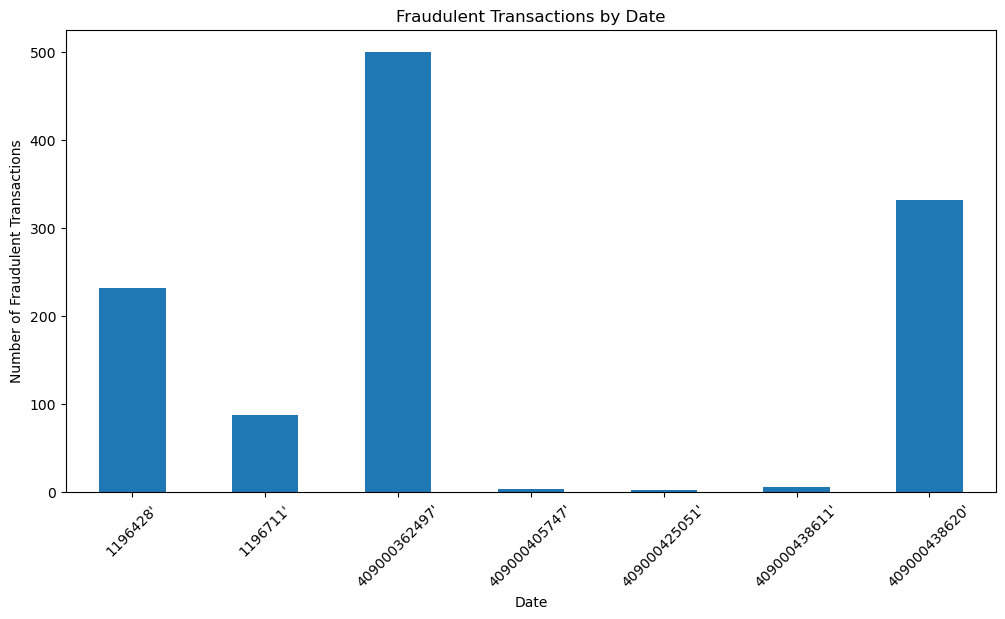

In [44]:
import matplotlib.pyplot as plt

# Group the transactions by date and count the number of fraudulent transactions
fraudulent_transactions_count = fraudulent_transactions.groupby('Account No').size()

# Create a bar plot
plt.figure(figsize=(12, 6))
fraudulent_transactions_count.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Date')
plt.xticks(rotation=45)
plt.show()

In [35]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('bank.csv')

# Select relevant features for analysis
features = [' DEPOSIT AMT', ' WITHDRAWAL AMT', 'BALANCE AMT']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Predict outliers
outliers = model.predict(data_scaled)

# Add the outlier predictions to the original dataset
data['Outlier'] = outliers

# Print the transactions flagged as potential fraud
fraudulent_transactions = data[data['Outlier'] == -1]
print(fraudulent_transactions[['DATE', 'TRANSACTION DETAILS', ' DEPOSIT AMT', ' WITHDRAWAL AMT', 'BALANCE AMT']])

              DATE               TRANSACTION DETAILS   DEPOSIT AMT  \
2925    10/26/2018  TRF FROM  Indiaforensic SERVICES  1.500000e+07   
2926    10/31/2018                TRF TO  Myur Joshi  3.806586e+06   
2939     1/30/2016                 TRF TO Maur Joshi  3.806586e+06   
2950      5/3/2016  TRF FROM  Indiaforensic SERVICES  2.021000e+08   
2972     9/28/2018         Payments For : 9090000577  3.806586e+06   
...            ...                               ...           ...   
104946   6/12/2017                    IMPS 100617 1C  3.806586e+06   
107423   9/11/2017                  IMPS 09092017 1C  3.806586e+06   
107770   9/25/2017                  IMPS 23092017 1C  3.806586e+06   
108330  10/16/2017                     IMPS 1410171C  3.806586e+06   
109017  11/13/2017                    IMPS 111117 1C  3.806586e+06   

         WITHDRAWAL AMT   BALANCE AMT  
2925       4.489190e+06  4.592000e+05  
2926       3.540000e+08 -3.535408e+08  
2939       1.700000e+08 -5.267348e+08  

In [38]:
df = pd.DataFrame(data)

print(df.head())

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074'  6/29/2017  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074'   7/5/2017  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074'  7/18/2017        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074'   8/1/2017   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074'  8/16/2017        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE   WITHDRAWAL AMT   DEPOSIT AMT  BALANCE AMT  Outlier  
0  6/29/2017     4.489190e+06     1000000.0    1000000.0        1  
1   7/5/2017     4.489190e+06     1000000.0    2000000.0        1  
2  7/18/2017     4.489190e+06      500000.0    2500000.0        1  
3   8/1/2017     4.489190e+06     3000000.0    5500000.0        1  
4  8/16/2017     4.489190e+06      500000.0    6000000.0        1  


In [39]:
# Download the DataFrame as a CSV file
df.to_csv('data.csv', index=False)

In [43]:
# Evaluate the model's performance
print(classification_report(outliers, [-1] * len(outliers)))  # Assuming -1 indicates an anomaly

              precision    recall  f1-score   support

          -1       0.01      1.00      0.02      1161
           1       0.00      0.00      0.00    115040

    accuracy                           0.01    116201
   macro avg       0.00      0.50      0.01    116201
weighted avg       0.00      0.01      0.00    116201



C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
y_scores = model.score_samples(data_scaled)
print(y_scores)

[-0.60653641 -0.61493572 -0.61591847 ... -0.4108262  -0.40306439
 -0.38854765]


In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer


# Load the transaction data into a pandas DataFrame
data = pd.read_csv('bank.csv')

# Preprocess the data
# (perform any necessary cleaning, feature engineering, and encoding)

# Select relevant features for analysis
features = [' DEPOSIT AMT', ' WITHDRAWAL AMT', 'BALANCE AMT']


# Create a new DataFrame with selected features
selected_data = data[features]

# Convert withdrawal and deposit amounts to numeric format
selected_data['WITHDRAWAL AMT'] = selected_data['WITHDRAWAL AMT'].str.replace(',', '').astype(float)
selected_data['DEPOSIT AMT'] = selected_data['DEPOSIT AMT'].str.replace(',', '').astype(float)

# Apply anomaly detection using Local Outlier Factor
model = LocalOutlierFactor(contamination=0.01)  # Adjust the contamination parameter as needed
outlier_scores = model.fit_predict(selected_data)

# Identify the outliers
outliers = selected_data[outlier_scores == -1]

# Print the identified outliers
print(outliers)

In [57]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('bank.csv')

# Select relevant features for analysis
features = [' DEPOSIT AMT', ' WITHDRAWAL AMT', 'BALANCE AMT']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Train the Local Outlier Factor model
model = LocalOutlierFactor(contamination=0.01)  # Adjust the contamination parameter as needed

# Predict outliers
outliers1 = model.fit_predict(data_scaled)

# Add the outlier predictions to the original dataset
data['Outlier1'] = outliers1

# Print the transactions flagged as potential fraud
fraudulent_transactions = data[data['Outlier1'] == -1]
print(fraudulent_transactions[['DATE', 'TRANSACTION DETAILS', ' DEPOSIT AMT', ' WITHDRAWAL AMT', 'BALANCE AMT']])

             DATE               TRANSACTION DETAILS   DEPOSIT AMT  \
0       6/29/2017  TRF FROM  Indiaforensic SERVICES     1000000.0   
1        7/5/2017  TRF FROM  Indiaforensic SERVICES     1000000.0   
3        8/1/2017   TRF FRM  Indiaforensic SERVICES     3000000.0   
4       8/16/2017        FDRL/INTERNAL FUND TRANSFE      500000.0   
5       8/16/2017        FDRL/INTERNAL FUND TRANSFE      500000.0   
...           ...                               ...           ...   
113943   8/8/2018      RTGS/UTIBH18220639517/Indfor     5100000.0   
114244  8/30/2018         NEFT/N242180143674200/IRC      724315.0   
115582  1/11/2019      NEFT/SBIN419011384876/Indfor      600000.0   
115625  1/15/2019         INDIAN OIL CORPORATION LT      683782.0   
116178   3/4/2019      NEFT/SBIN619063713746/Indfor     1200000.0   

         WITHDRAWAL AMT   BALANCE AMT  
0          4.489190e+06  1.000000e+06  
1          4.489190e+06  2.000000e+06  
3          4.489190e+06  5.500000e+06  
4          

In [58]:
df = pd.DataFrame(data)

print(df.head())

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074'  6/29/2017  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074'   7/5/2017  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074'  7/18/2017        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074'   8/1/2017   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074'  8/16/2017        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE   WITHDRAWAL AMT   DEPOSIT AMT  BALANCE AMT  Outlier1  
0  6/29/2017     4.489190e+06     1000000.0    1000000.0        -1  
1   7/5/2017     4.489190e+06     1000000.0    2000000.0        -1  
2  7/18/2017     4.489190e+06      500000.0    2500000.0         1  
3   8/1/2017     4.489190e+06     3000000.0    5500000.0        -1  
4  8/16/2017     4.489190e+06      500000.0    6000000.0        -1  


In [59]:
# Download the DataFrame as a CSV file
df.to_csv('data.csv1', index=False)

In [60]:
# Evaluate the model's performance
print(classification_report(outliers1, [-1] * len(outliers1)))  # Assuming -1 indicates an anomaly

              precision    recall  f1-score   support

          -1       0.01      1.00      0.02      1162
           1       0.00      0.00      0.00    115039

    accuracy                           0.01    116201
   macro avg       0.00      0.50      0.01    116201
weighted avg       0.00      0.01      0.00    116201



C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('bank.csv')

# Select relevant features for analysis
features = [' DEPOSIT AMT', ' WITHDRAWAL AMT', 'BALANCE AMT']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Train the One-Class SVM model
model = OneClassSVM(nu=0.01)  # Adjust the nu parameter as needed

# Predict outliers
outliers2 = model.fit_predict(data_scaled)

# Add the outlier predictions to the original dataset
data['Outlier2'] = outliers2

# Print the transactions flagged as potential fraud
fraudulent_transactions = data[data['Outlier2'] == -1]
print(fraudulent_transactions[['DATE', 'TRANSACTION DETAILS', ' DEPOSIT AMT', ' WITHDRAWAL AMT', 'BALANCE AMT']])

              DATE               TRANSACTION DETAILS   DEPOSIT AMT  \
11       8/16/2017  INDO GIBL Indiaforensic STL02071  3.806586e+06   
12       8/16/2017  INDO GIBL Indiaforensic STL03071  3.806586e+06   
15       8/16/2017  INDO GIBL Indiaforensic STL06071  3.806586e+06   
28       8/16/2017  INDO GIBL Indiaforensic STL21071  3.806586e+06   
30       8/16/2017  INDO GIBL Indiaforensic STL24071  3.806586e+06   
...            ...                               ...           ...   
109576   12/4/2017                    IMPS 041217 3C  3.806586e+06   
109755  12/12/2017                    IMPS 121217 3C  3.806586e+06   
109818  12/14/2017                    IMPS 141217 3C  3.806586e+06   
109863  12/18/2017                    IMPS 171217 1C  3.806586e+06   
112018   4/27/2018               TO For 709003779660  2.766302e+07   

         WITHDRAWAL AMT   BALANCE AMT  
11         1.800000e+04  8.348100e+06  
12         5.000000e+03  8.343100e+06  
15         4.180000e+04  8.023900e+06  

In [63]:
df = pd.DataFrame(data)

print(df.head())

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074'  6/29/2017  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074'   7/5/2017  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074'  7/18/2017        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074'   8/1/2017   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074'  8/16/2017        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE   WITHDRAWAL AMT   DEPOSIT AMT  BALANCE AMT  Outlier2  
0  6/29/2017     4.489190e+06     1000000.0    1000000.0         1  
1   7/5/2017     4.489190e+06     1000000.0    2000000.0         1  
2  7/18/2017     4.489190e+06      500000.0    2500000.0         1  
3   8/1/2017     4.489190e+06     3000000.0    5500000.0         1  
4  8/16/2017     4.489190e+06      500000.0    6000000.0         1  


In [64]:
# Download the DataFrame as a CSV file
df.to_csv('data.csv2', index=False)

In [65]:
# Evaluate the model's performance
print(classification_report(outliers2, [-1] * len(outliers2)))  # Assuming -1 indicates an anomaly

              precision    recall  f1-score   support

          -1       0.01      1.00      0.02      1169
           1       0.00      0.00      0.00    115032

    accuracy                           0.01    116201
   macro avg       0.01      0.50      0.01    116201
weighted avg       0.00      0.01      0.00    116201



C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


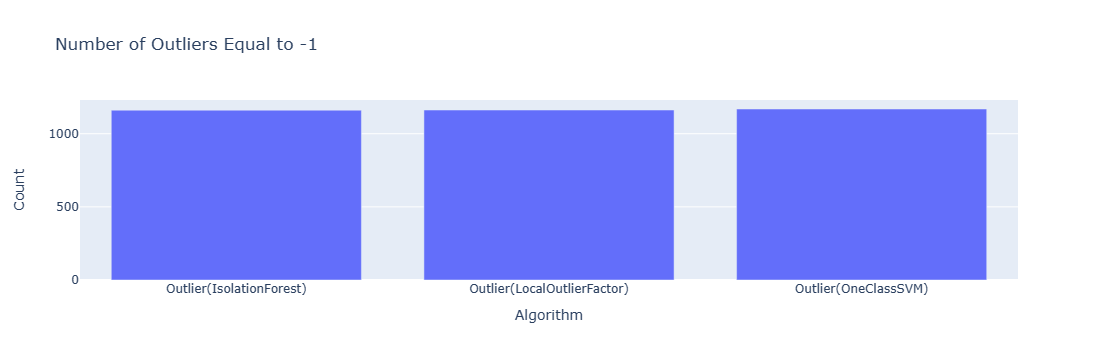

In [71]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('Outliers.csv')

# Select the last three columns
outlier_columns = ['Outlier(IsolationForest)', 'Outlier(LocalOutlierFactor)', 'Outlier(OneClassSVM)']

# Count the number of -1 outliers in each column
outlier_counts = data[outlier_columns].apply(lambda x: x[x == -1].count())

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=outlier_counts.index, y=outlier_counts.values)])

# Configure layout options
fig.update_layout(
    title='Number of Outliers Equal to -1',
    xaxis=dict(title='Algorithm'),
    yaxis=dict(title='Count')
)

# Show the plot
fig.show()